# Overview

This script performs EDA and then preprocesses the twitter.csv dataset to train a bidirectional LSTM model which is in turn used to predict the sentiments behind tweets fetched in real time using tweepy and classify them as positive negative or neutral.

# **Importing All Required Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import re   
import matplotlib.patches as mpatches

# Load Dataset

In [5]:
df = pd.read_csv('Reddit_Data.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [6]:
df.tail()

,clean_comment,category
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1
37248,facebook itself now working bjp’ cell,0


# Data Preprocessing Techniques

Missing values

Data Cleaning

Extract Features

Feature Encodiing

Label Encoding

Handle Outliers

Separate Independent and dependent Features

then Select best Feature

# Data Exploration

Data exploration is a key aspect of data analysis and model building. Without spending significant time 
on understanding the data and its patterns one cannot expect to build efficient predictive models. Data
exploration takes major chunk of time in a data science project comprising of data cleaning and 
preprocessing

In [7]:
df.shape

(37249, 2)

In [8]:
df.dtypes

clean_comment    object
category          int64
dtype: object

In [9]:
df.columns

Index(['clean_comment', 'category'], dtype='object')

In [10]:
df.describe()

,category
count,37249.000000
mean,0.202771
std,0.778515
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
category,37249.0,0.202771,0.778515,-1.0,0.0,0.0,1.0,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [13]:
df.min()

category   -1
dtype: int64

In [14]:
df.max()

category    1
dtype: int64

In [15]:
df.nunique()

clean_comment    36799
category             3
dtype: int64

In [16]:
df.corr()

,category
category,1.0


In [17]:
df.ndim

2

In [18]:
df.size

74498

In [19]:
type(df)

pandas.core.frame.DataFrame

# Missing Values

In [20]:
null_df=pd.DataFrame()
null_df['Features']=df.isnull().sum().index
null_df['Null values']=df.isnull().sum().values
null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)

,Features,Null values,% Null values
0,clean_comment,100,0.268464
1,category,0,0.000000


In [21]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

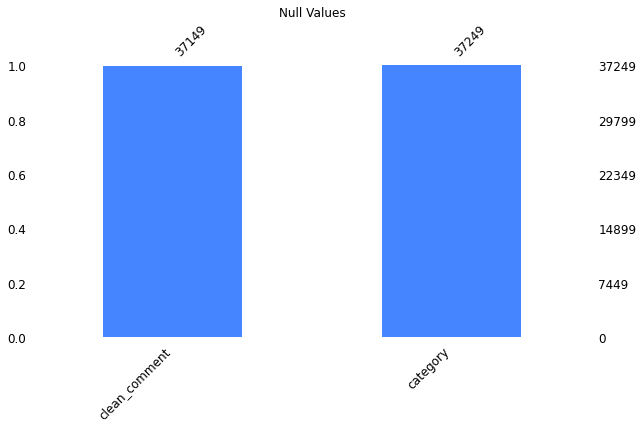

In [22]:
import missingno as no
no.bar(df,figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))
plt.title("Null Values")
plt.show()

# To Drop Missing Values

In [23]:
df.dropna(axis=0, inplace=True)

In [24]:
df.shape

(37149, 2)

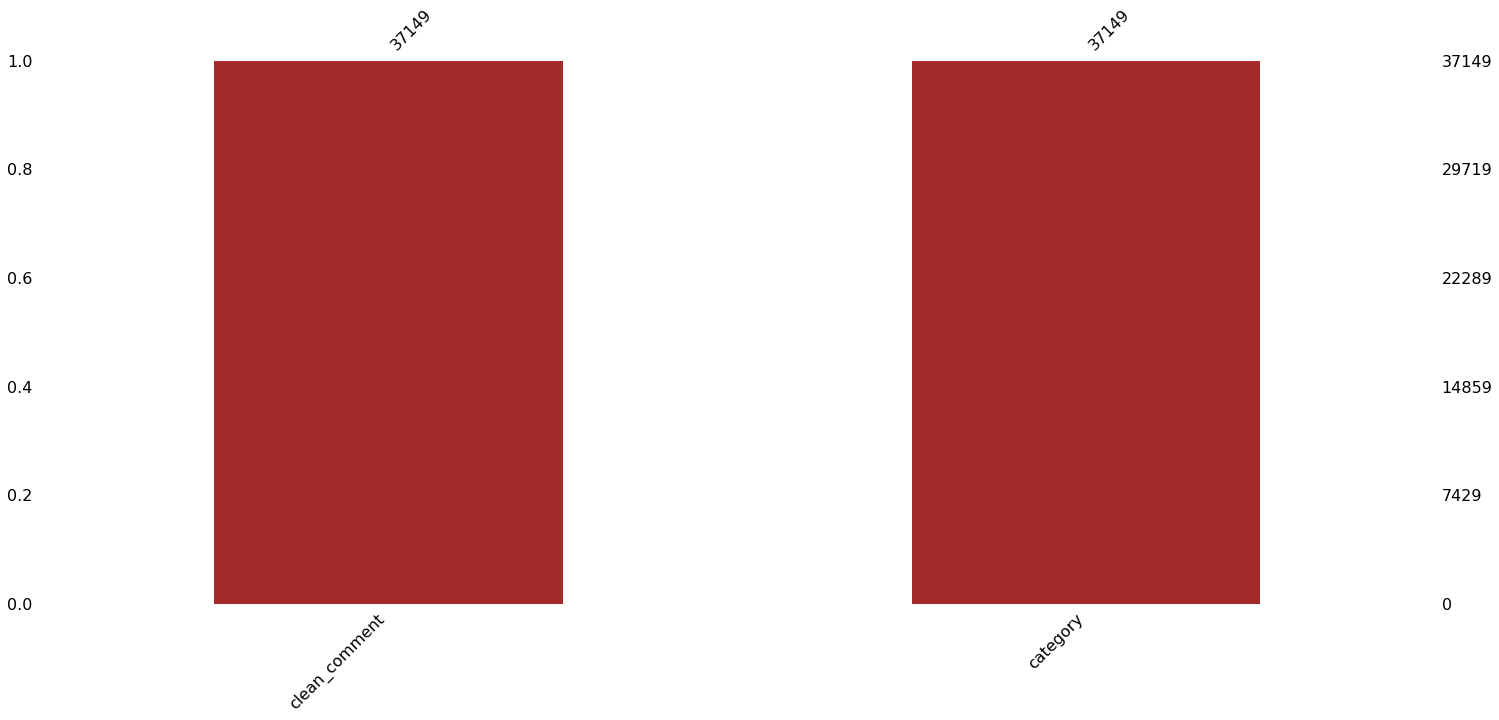

In [25]:
import missingno as no
no.bar(df,color='brown')

# Mapping the values

In [26]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,Positive
1,buddhism has very much lot compatible with chr...,Positive
2,seriously don say thing first all they won get...,Negative
3,what you have learned yours and only yours wha...,Neutral
4,for your own benefit you may want read living ...,Positive



# Exploratory Data Analysis 

# Data Visualization

Data visualization is the graphical representation of data in order to explore and visualize data to
uncover insights from the start or identify areas or patterns to dig into more. Using interactive
dashboards and point-and-click data exploration, users can better understand the bigger picture 
and get to insights faster

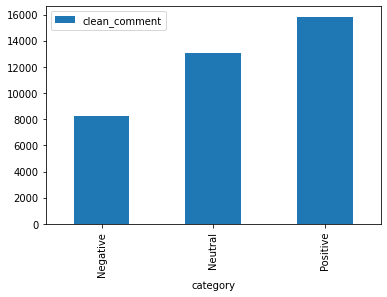

In [27]:
#Distribution of all sentiments
df.groupby('category').count().plot(kind='bar')

In [29]:
tweet_len = pd.Series([len(tweet.split()) for tweet in df['clean_comment']])

In [30]:
tweet_len

0         39
1        196
2         86
3         29
4        112
        ... 
37144      1
37145     19
37146      6
37147      2
37148      6
Length: 37149, dtype: int64

In [31]:
tweet_len[0]

39

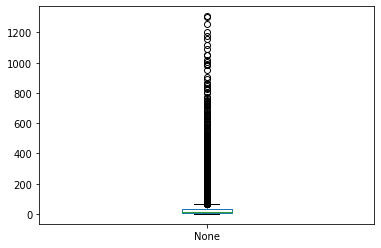

In [33]:
tweet_len = pd.Series([len(tweet.split()) for tweet in df['clean_comment']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

## Plotting the distribution of text length for positive sentiment tweets

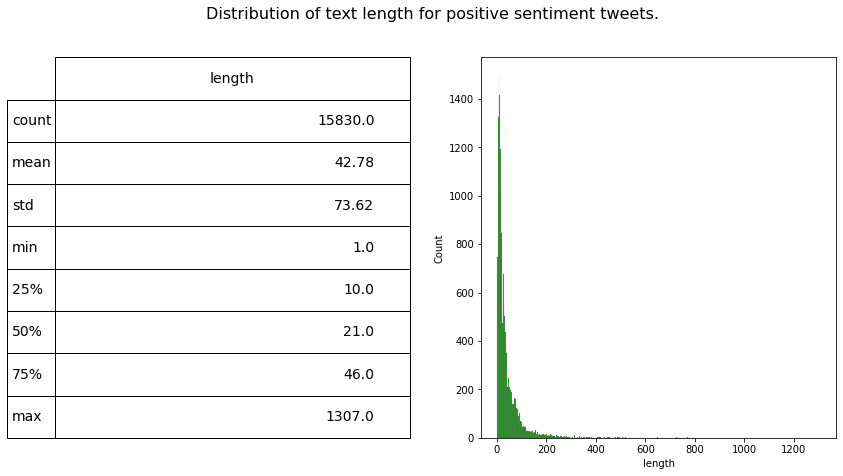

In [37]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

## Plotting the Distribution of text length for Negative sentiment tweets.

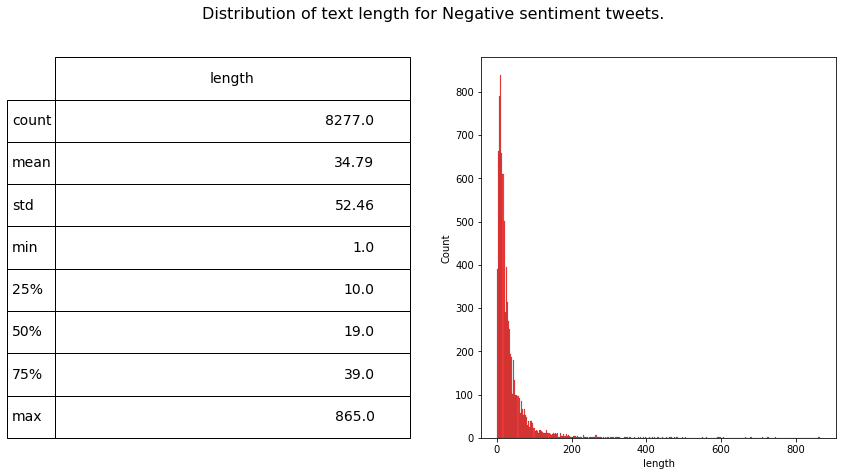

In [38]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

## Plotting the Distribution of text length for Neutral sentiment tweets.

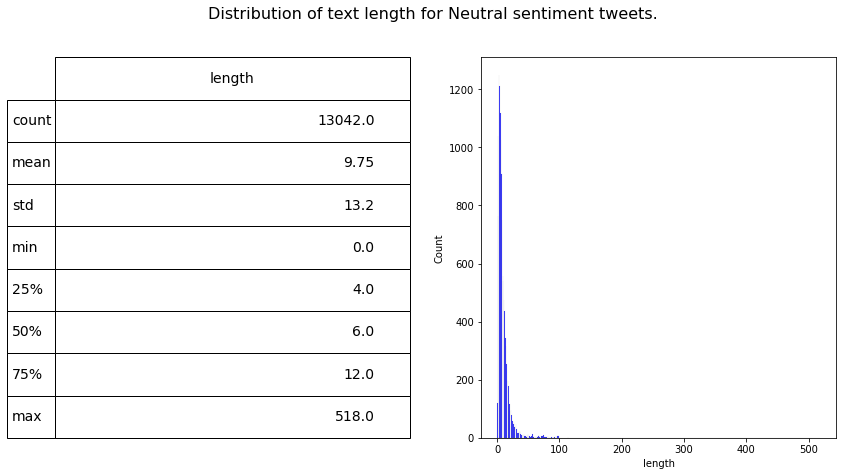

In [40]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Neutral']['length'], ax=ax1,color='blue')
describe = df.length[df.category=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Neutral sentiment tweets.', fontsize=16)

plt.show()

# Plotting the Pie chart of the percentage of different sentiments of all the tweets

In [41]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

In [43]:
df['clean_comment'] = df['clean_comment'].str.lower()

In [44]:
df.drop(['length'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of                                            clean_comment  category
0       family mormon have never tried explain them t...  Positive
1      buddhism has very much lot compatible with chr...  Positive
2      seriously don say thing first all they won get...  Negative
3      what you have learned yours and only yours wha...   Neutral
4      for your own benefit you may want read living ...  Positive
...                                                  ...       ...
37244                                              jesus   Neutral
37245  kya bhai pure saal chutiya banaya modi aur jab...  Positive
37246              downvote karna tha par upvote hogaya    Neutral
37247                                         haha nice   Positive
37248             facebook itself now working bjp’ cell    Neutral

[37149 rows x 2 columns]>

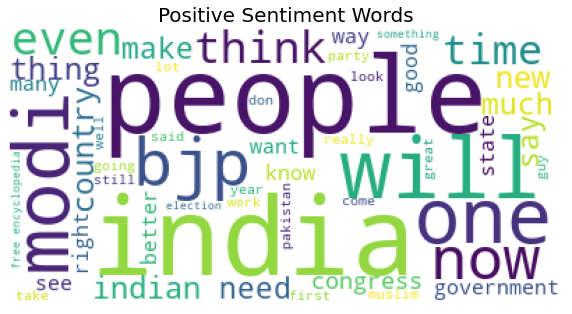

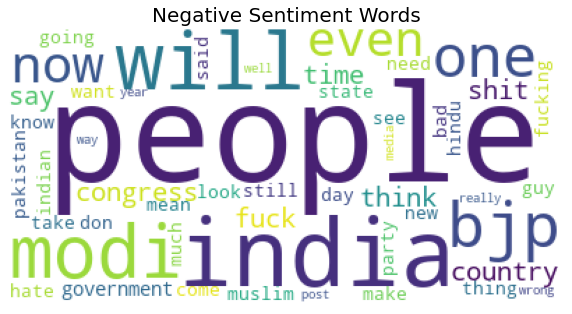

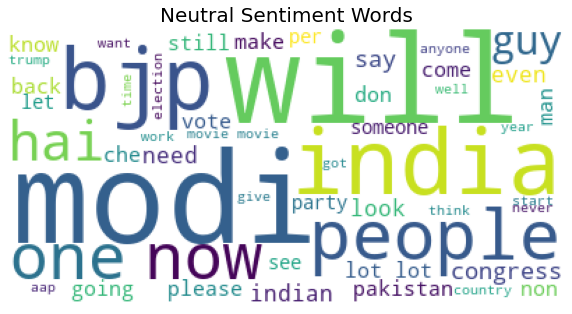

In [46]:
#### Visualizing data into wordclouds


from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_comment']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'Positive')
     
# Negative tweet words
wordcount_gen(df, 'Negative')
     
# Neutral tweet words
wordcount_gen(df, 'Neutral')

# Data Preprocessing

In [47]:
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
import tensorflow as tf

In [51]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['clean_comment'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_comment'][0]))


Original tweet ->  family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches 

Processed tweet -> ['famili', 'mormon', 'never', 'tri', 'explain', 'still', 'stare', 'puzzl', 'time', 'time', 'like', 'kind', 'strang', 'creatur', 'nonetheless', 'come', 'admir', 'patienc', 'calm', 'equanim', 'accept', 'compass', 'develop', 'thing', 'buddhism', 'teach']


In [52]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, df['clean_comment']))

In [53]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [54]:
print(X[0])
print(Y[0])

['famili', 'mormon', 'never', 'tri', 'explain', 'still', 'stare', 'puzzl', 'time', 'time', 'like', 'kind', 'strang', 'creatur', 'nonetheless', 'come', 'admir', 'patienc', 'calm', 'equanim', 'accept', 'compass', 'develop', 'thing', 'buddhism', 'teach']
2


In [55]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

#import sklearn.preprocessing as pr

# Normalize BoW features in training and test set
#X_train = pr.normalize(X_train, axis=1)
#X_test  = pr.normalize(X_test, axis=1)

# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['000', '100', '1000', '101', '10k', '10th', '116', '120', '140', '150', '16th', '180ml', '1947', '1980', '1984', '1990', '1999', '19th', '1st', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '2024', '2030', '20k', '21st', '250', '295a', '2findia', '2fr', '2nd', '300', '3000', '370', '375ml', '377', '3rd', '400', '4th', '500', '5000', '5th', '6000', '60ml', '66a', '750ml', '80', '800', '90', 'aadhaar', 'aadhar', 'aadmi', 'aag', 'aaj', 'aam', 'aamir', 'aan', 'aap', 'aaptard', 'abandon', 'abbastanza', 'abcd', 'abdul', 'abe', 'abhi', 'abhinandan', 'abil', 'abki', 'abl', 'abp', 'abraham', 'abroad', 'absenc', 'absolut', 'absurd', 'abus', 'abvp', 'academ', 'accent', 'accept', 'access', 'acch', 'accid', 'accident', 'accommod', 'accomplish', 'accord', 'account', 'accumul', 'accur', 'accus', 'ach', 'acha', 'achiev', 'acknowledg', 'aclu', 'acquir', 'across', 'ac

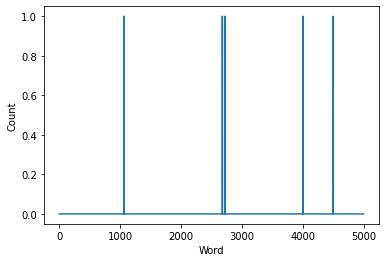

In [57]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

# Tokenizing & Padding

In [59]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_comment'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_comment'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
  family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches 
After Tokenization & Padding 
 [ 254   10  122  641  870   39    9   94   23   53   53   21   42  289
 4163    9   10  128 3148    5    1    2 4415   10 1438   18    1  111
 1517    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


# Saving tokenized data

In [60]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Train & Test Split

In [61]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (22289, 50) (22289, 3)
Validation Set -> (7430, 50) (7430, 3)
Test Set -> (7430, 50) (7430, 3)


In [62]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Bidirectional LSTM Using NN

In [63]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [64]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model
#num_epochs = 8
batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
__________________________________________________

# Model Accuracy & Loss

In [65]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8074
Precision : 0.8130
Recall    : 0.8000
F1 Score  : 0.8065


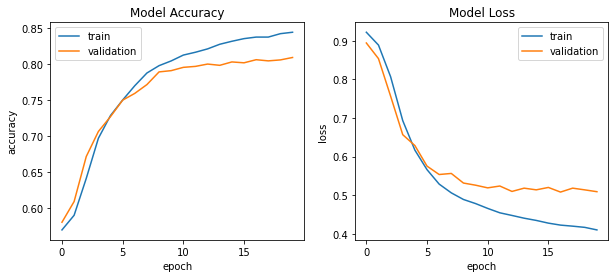

In [66]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

# Model Confusion Matrix

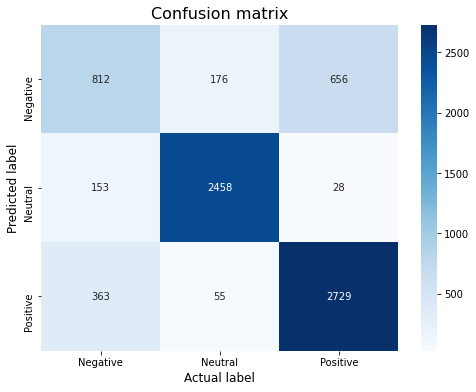

In [67]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

# Model save and load for the prediction

In [68]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


In [69]:
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [70]:
predict_class(['"I hate when I have to call and wake people up'])

The predicted sentiment is Neutral


In [71]:
predict_class(['The food was meh'])

The predicted sentiment is Neutral


In [72]:
predict_class(['He is a best minister india ever had seen'])

The predicted sentiment is Positive
